# This is our Task
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
● As a business manager, try to find out the weak areas where you can
work to make more profit.
● What all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
d = pd.read_csv("SampleSuperstore.csv")

In [3]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
#checking the type of data available in columns
d['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [5]:
d['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
d['Country'].unique()

array(['United States'], dtype=object)

In [7]:
d['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [8]:
d['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
d['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
d['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
for col in d:
    if col == 'Country' or col == 'State' or col == 'City' or col == 'Postal Code':
        continue
    print(d[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
[261.96  731.94   14.62  ... 437.472  97.98  243.16 ]
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
[ 41.9136 219.582    6.8714 ...  16.124    4.1028  72.948 ]


In [12]:
#to check is there any null values
d.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#its returns all details about coloumn
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

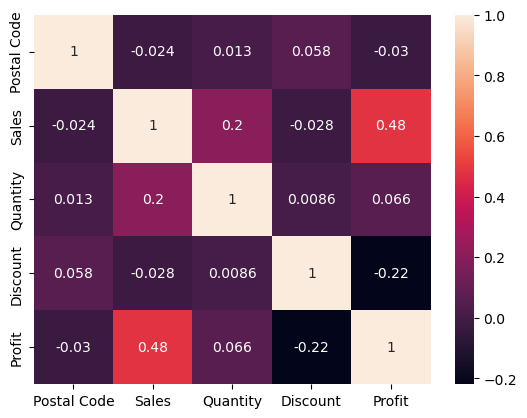

In [47]:
#heat map is used to see the corlation betwee the data
sns.heatmap(d.corr(), annot=True)

In [15]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [16]:
#this problem break into two problems to easyly understand
loss = d[d['Profit']<0]
profit = d[d['Profit']>0]

In [43]:
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [18]:
profit['Profit'].mean()

54.917883767684025

In [19]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [20]:
loss['Profit'].mean()

-83.44804152859435

<AxesSubplot:xlabel='Region', ylabel='count'>

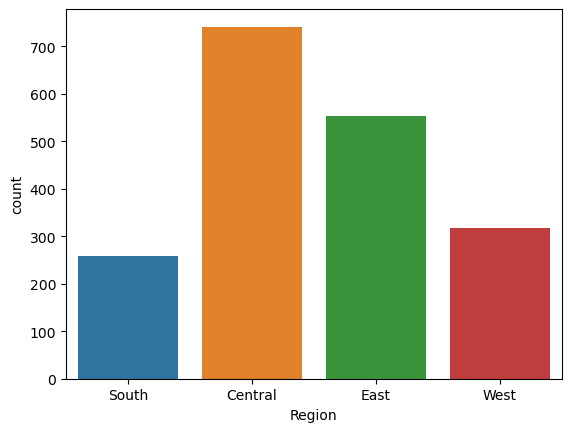

In [21]:
#we see that sales of region where central is high
sns.countplot(data = loss, x = 'Region')

<AxesSubplot:title={'center':'Profit'}, xlabel='Region', ylabel='count'>

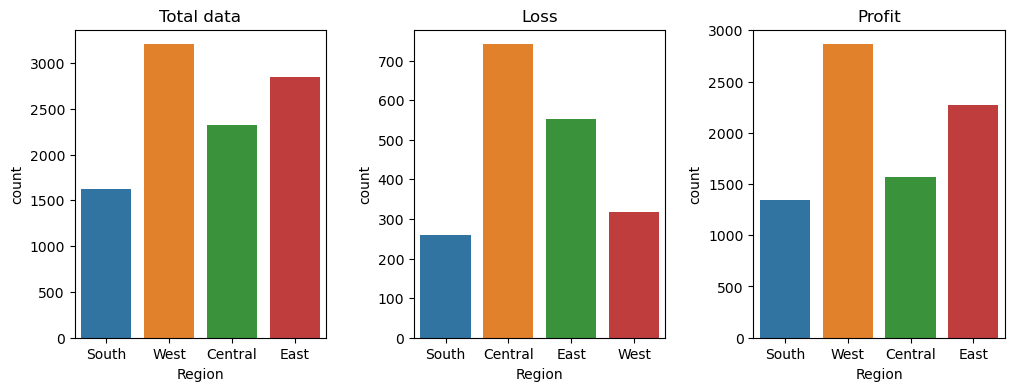

In [22]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.35)

plt.subplot(1, 3, 1)
plt.title('Total data')
sns.countplot(data=d, x='Region')

plt.subplot(1, 3, 2)
plt.title('Loss')
sns.countplot(data=loss, x='Region')

plt.subplot(1, 3, 3)
plt.title('Profit')
sns.countplot(data=profit, x='Region')


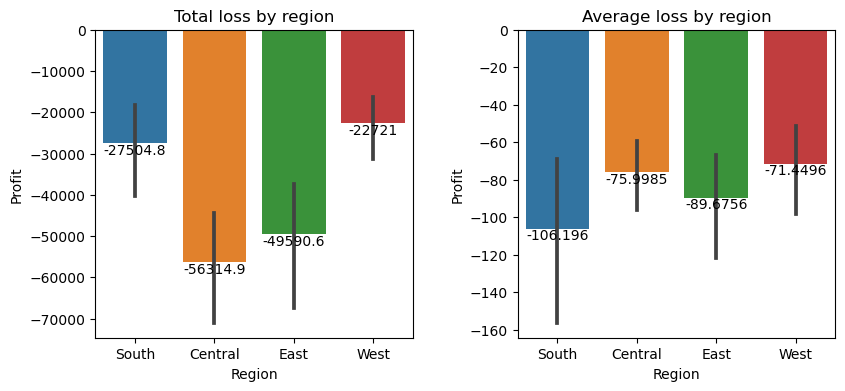

In [23]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.33) 
plt.subplot(1,3,1)
plt.title('Total loss by region')
x = sns.barplot(data = loss, x= 'Region',y='Profit',estimator=np.sum)
for i in x.containers:
    x.bar_label(i,)
plt.subplot(1,3,2)
plt.title('Average loss by region')
y = sns.barplot(data = loss, x= 'Region',y='Profit')
for i in y.containers:
    y.bar_label(i,)

In [24]:
losspivot = loss.pivot_table(values='Profit',index='Category',columns='Region')
losspivot

Region,Central,East,South,West
Category,,,,
Furniture,-61.685695,-102.183616,-171.069390,-81.664088
Office Supplies,-89.291108,-42.022274,-57.138301,-33.577703
Technology,-66.864371,-154.394354,-253.848274,-117.029733


In [25]:
profitpivot = profit.pivot_table(values='Profit',index='Category',columns='Region')
profitpivot 

Region,Central,East,South,West
Category,,,,
Furniture,106.263159,53.548900,62.521463,44.580967
Office Supplies,40.578683,34.585275,36.175279,31.646731
Technology,99.929152,171.578114,107.158184,93.272583


In [26]:
datapivot = d.pivot_table(values='Profit',index='Category',columns='Region')
datapivot

Region,Central,East,South,West
Category,,,,
Furniture,-5.968918,5.068496,20.395199,16.272914
Office Supplies,6.244712,23.957114,20.086827,27.733183
Technology,80.231981,88.714084,68.231506,73.962687


<AxesSubplot:title={'center':'Profit data'}, xlabel='Region', ylabel='Category'>

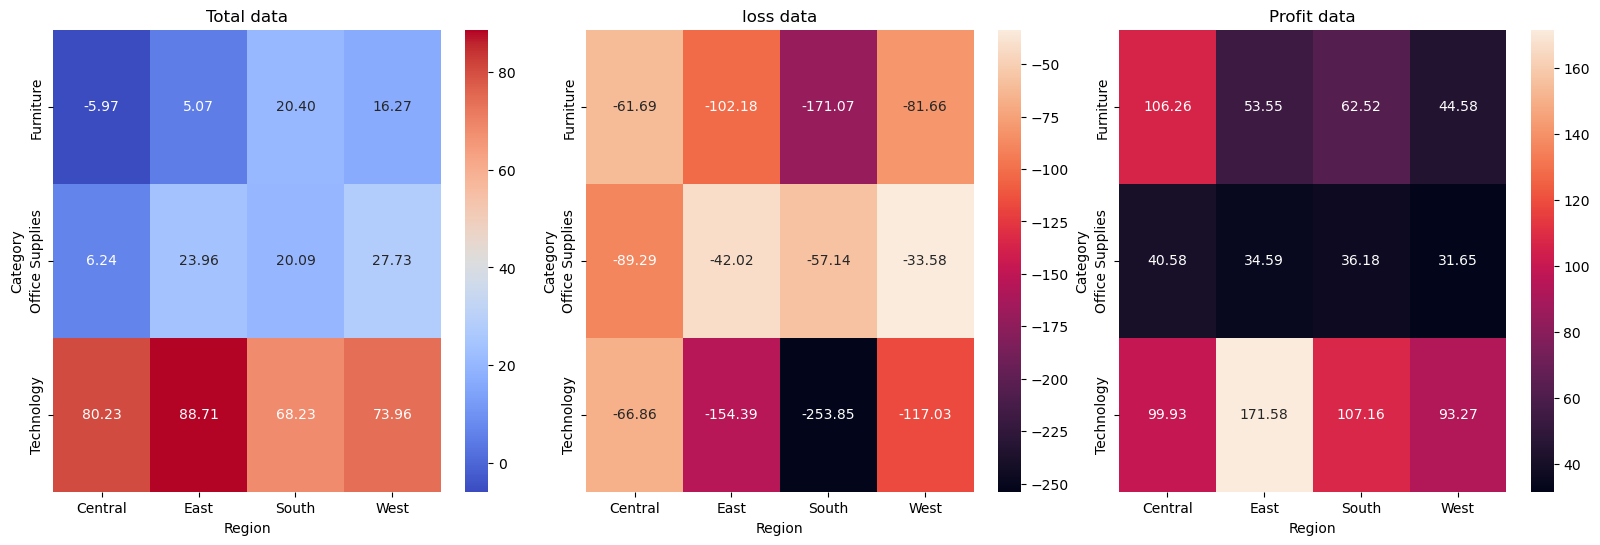

In [46]:
plt.figure(figsize=(20, 6))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,3,1)
sns.heatmap(datapivot, annot = True, cmap = 'coolwarm',fmt='.2f')
plt.title("Total data")
plt.subplot(1,3,2)
sns.heatmap(losspivot, annot = True,fmt='.2f')
plt.title("loss data")
plt.subplot(1,3,3)
plt.title("Profit data")
sns.heatmap(profitpivot,fmt='.2f', annot = True)

Now we what the main problem of losses

In [28]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
               Sales      Profit  Discount
Region                                    
Central  141282.6588 -56314.8850  0.549447
East     160864.0120 -49590.6075  0.446835
South     91635.1850 -27504.8323  0.491699
West      74925.2990 -22720.9609  0.371541
---------------------grouped profit data-------------------------
               Sales       Profit  Discount
Region                                     
Central  355822.9170   96021.2475  0.094780
East     509215.9260  141113.3875  0.072276
South    294021.3920   74254.2626  0.081454
West     641746.6235  131139.4098  0.080283
---------------------grouped all data-------------------------
               Sales       Profit  Discount
Region                                     
Central  501239.8908   39706.3625  0.240353
East     678781.2400   91522.7800  0.145365
South    391721.9050   46749.4303  0.147253
West     725457.8245  108418.4489  0.109335


In [29]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
                       Sales      Profit  Discount
Category                                          
Furniture        257885.5868 -60936.1090  0.367143
Office Supplies   91608.6750 -56615.2585  0.617607
Technology       119212.8930 -38579.9182  0.333579
---------------------grouped profit data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        465116.9615   79387.3818  0.071943
Office Supplies  618988.7490  179106.0593  0.078341
Technology       716701.1480  184034.8663  0.097775
---------------------grouped all data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        741999.7953   18451.2728  0.173923
Office Supplies  719047.0320  122490.8008  0.157285
Technology       836154.0330  145454.9481  0.132323


In [30]:
gdsloss = loss.groupby(["Region","State"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdsloss)

                              Sales      Profit  Discount
Region  State                                            
Central Illinois         38626.2020 -19501.6975  0.564314
        Texas           102656.4568 -36813.1875  0.541646
East    Connecticut        252.3570    -19.6146  0.300000
        Delaware           510.2790    -85.8963  0.300000
        Maryland           789.8030    -71.1170  0.300000
        Massachusetts     3275.3210   -566.2617  0.300000
        New Hampshire     1053.1640   -105.3164  0.300000
        New Jersey         418.2920    -51.2906  0.300000
        New York         26533.3500  -5031.1378  0.310638
        Ohio             49807.6240 -21750.0002  0.472249
        Pennsylvania     75792.2320 -21602.8515  0.460791
        Rhode Island      1758.2460   -230.1678  0.300000
        West Virginia      673.3440    -76.9536  0.300000
South   Florida          45694.1320  -8689.8295  0.501984
        North Carolina   28226.5400 -11557.9854  0.505882
        Tennes

<AxesSubplot:xlabel='State', ylabel='Profit'>

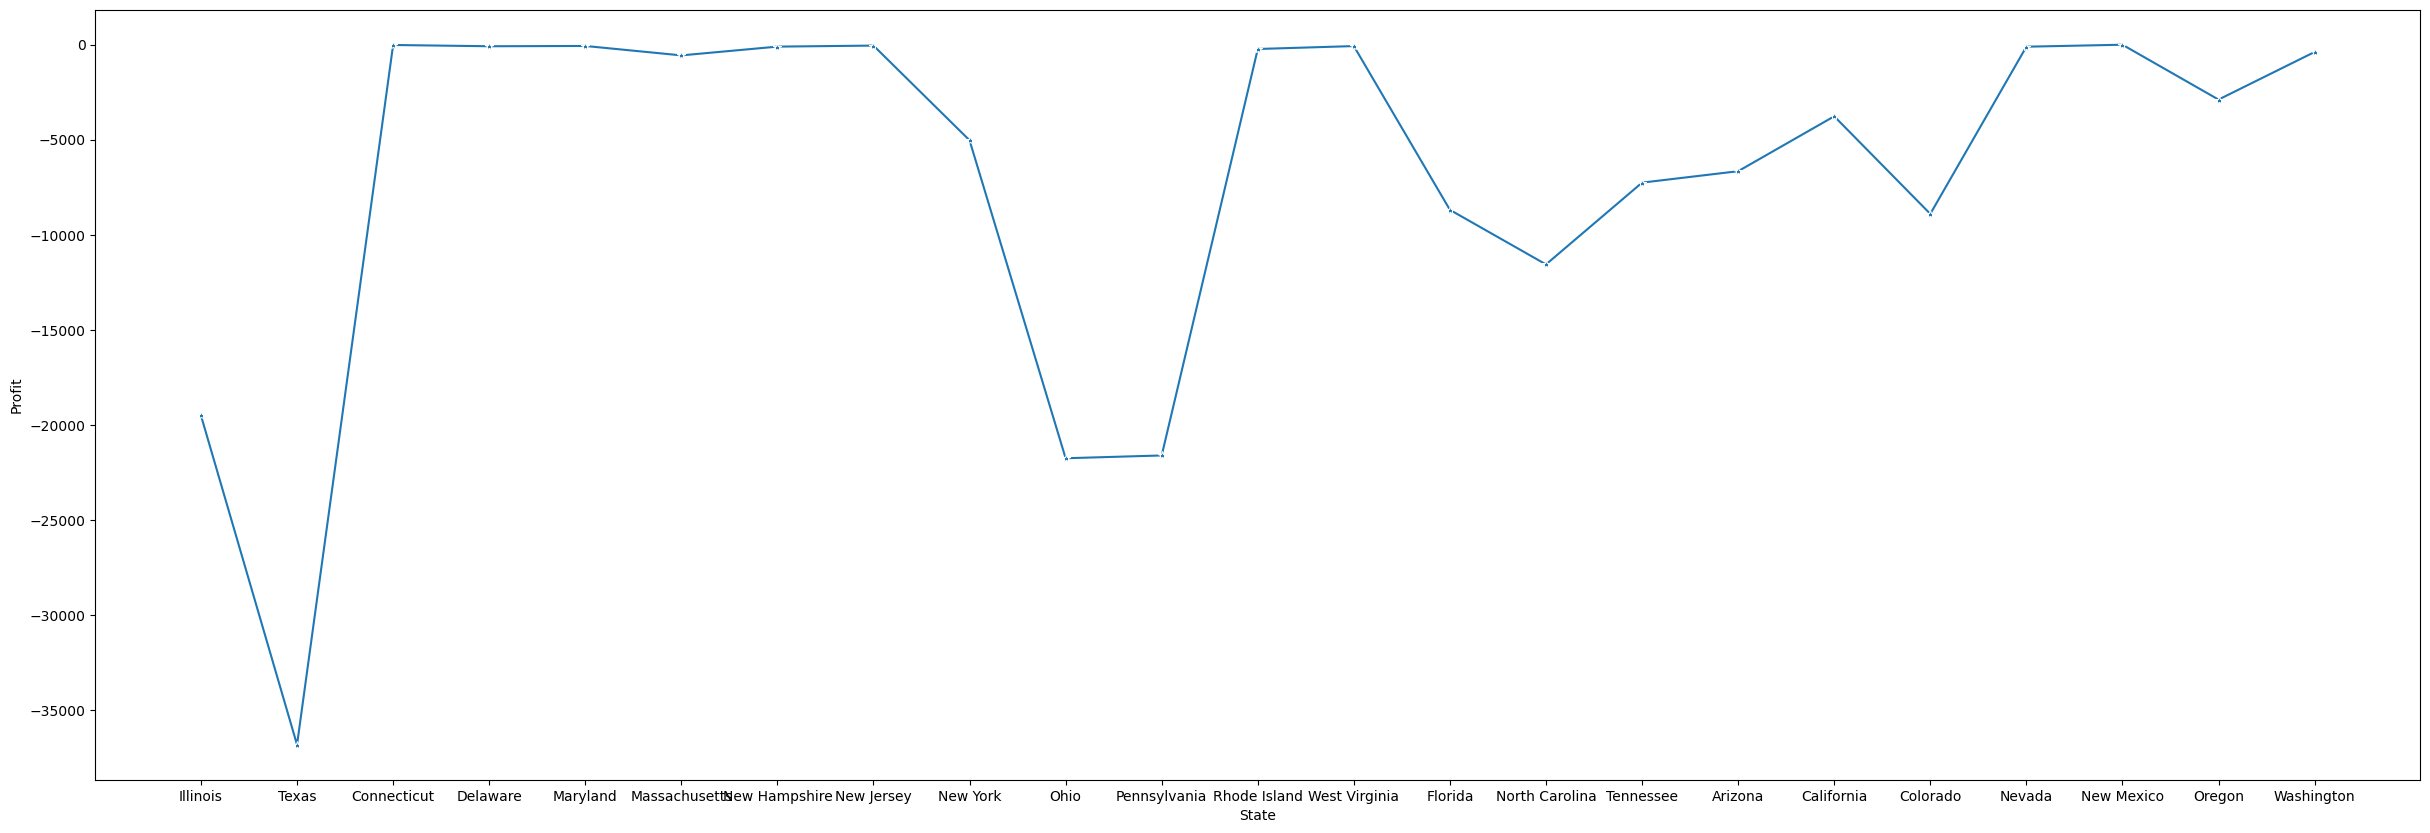

In [31]:
plt.figure(figsize=(30, 10))
sns.lineplot(data = gdsloss, x = "State", y = "Profit", marker= "*", dashes=True)

In [32]:
gdsprofit = profit.groupby(["Region","State"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdsprofit)

                                    Sales      Profit  Discount
Region  State                                                  
Central Illinois               40812.7250   6893.8105  0.201702
        Indiana                53549.4200  18382.9363  0.000000
        Iowa                    4579.7600   1183.8119  0.000000
        Kansas                  2914.3100    836.4435  0.000000
        Michigan               75767.8040  24463.1876  0.007087
        Minnesota              29361.3400  10823.1874  0.000000
        Missouri               22205.1500   6436.2105  0.000000
        Nebraska                7464.9300   2037.0942  0.000000
        North Dakota             919.9100    230.1497  0.000000
        Oklahoma               19683.3900   4853.9560  0.000000
        South Dakota            1315.5600    394.8283  0.000000
        Texas                  65134.0080  11083.8312  0.202231
        Wisconsin              32114.6100   8401.8004  0.000000
East    Connecticut            12579.440

In [33]:
gdlrc = loss.groupby(["Region","Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdlrc)

                              Sales      Profit  Discount
Region  Category                                         
Central Furniture        85278.5008 -19554.3653  0.443659
        Office Supplies  33072.5080 -33484.1655  0.680000
        Technology       22931.6500  -3276.3542  0.234694
East    Furniture        87079.1600 -18801.7854  0.330978
        Office Supplies  27642.0250  -9791.1899  0.566953
        Technology       46142.8270 -20997.6322  0.397794
South   Furniture        30742.0380  -9922.0246  0.302586
        Office Supplies  20402.7810  -9713.5112  0.588235
        Technology       40490.3660  -7869.2965  0.316129
West    Furniture        54785.8880 -12657.9337  0.277742
        Office Supplies  10491.3610  -3626.3919  0.556481
        Technology        9648.0500  -6436.6353  0.272727


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

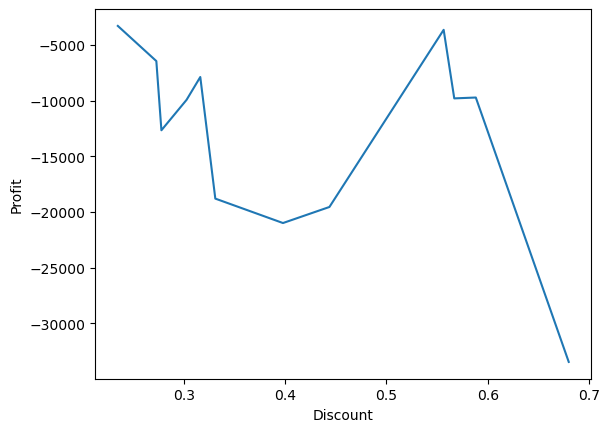

In [34]:
sns.lineplot(data = gdlrc, x = "Discount", y = 'Profit', ci = None)

In [35]:
grouped_data = profit.groupby(["Region","Segment"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data)

                           Sales      Profit  Discount
Region  Segment                                       
Central Consumer     162941.1130  43194.5043  0.096811
        Corporate    120981.8210  32979.3059  0.100424
        Home Office   71899.9830  19847.4373  0.081270
East    Consumer     257572.1620  69142.6333  0.076190
        Corporate    149020.5510  39466.8154  0.065945
        Home Office  102623.2130  32503.9388  0.071744
South   Consumer     156527.7440  39381.8262  0.082051
        Corporate     97411.0380  24628.0515  0.085308
        Home Office   40082.6100  10244.3849  0.072321
West    Consumer     318744.9720  67345.9566  0.077632
        Corporate    201150.6155  39692.1688  0.087035
        Home Office  121851.0360  24101.2844  0.076660


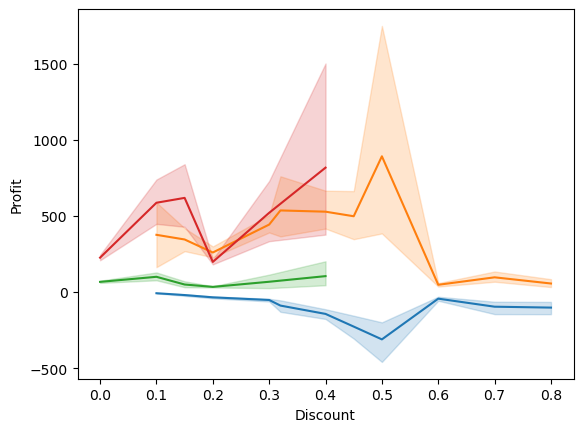

In [40]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='Discount', y='Profit', data=loss)
ax1 = sns.lineplot(x='Discount', y='Sales', data=loss)
ax= sns.lineplot(x='Discount', y='Profit', data=profit)
ax1 = sns.lineplot(x='Discount', y='Sales', data=profit)

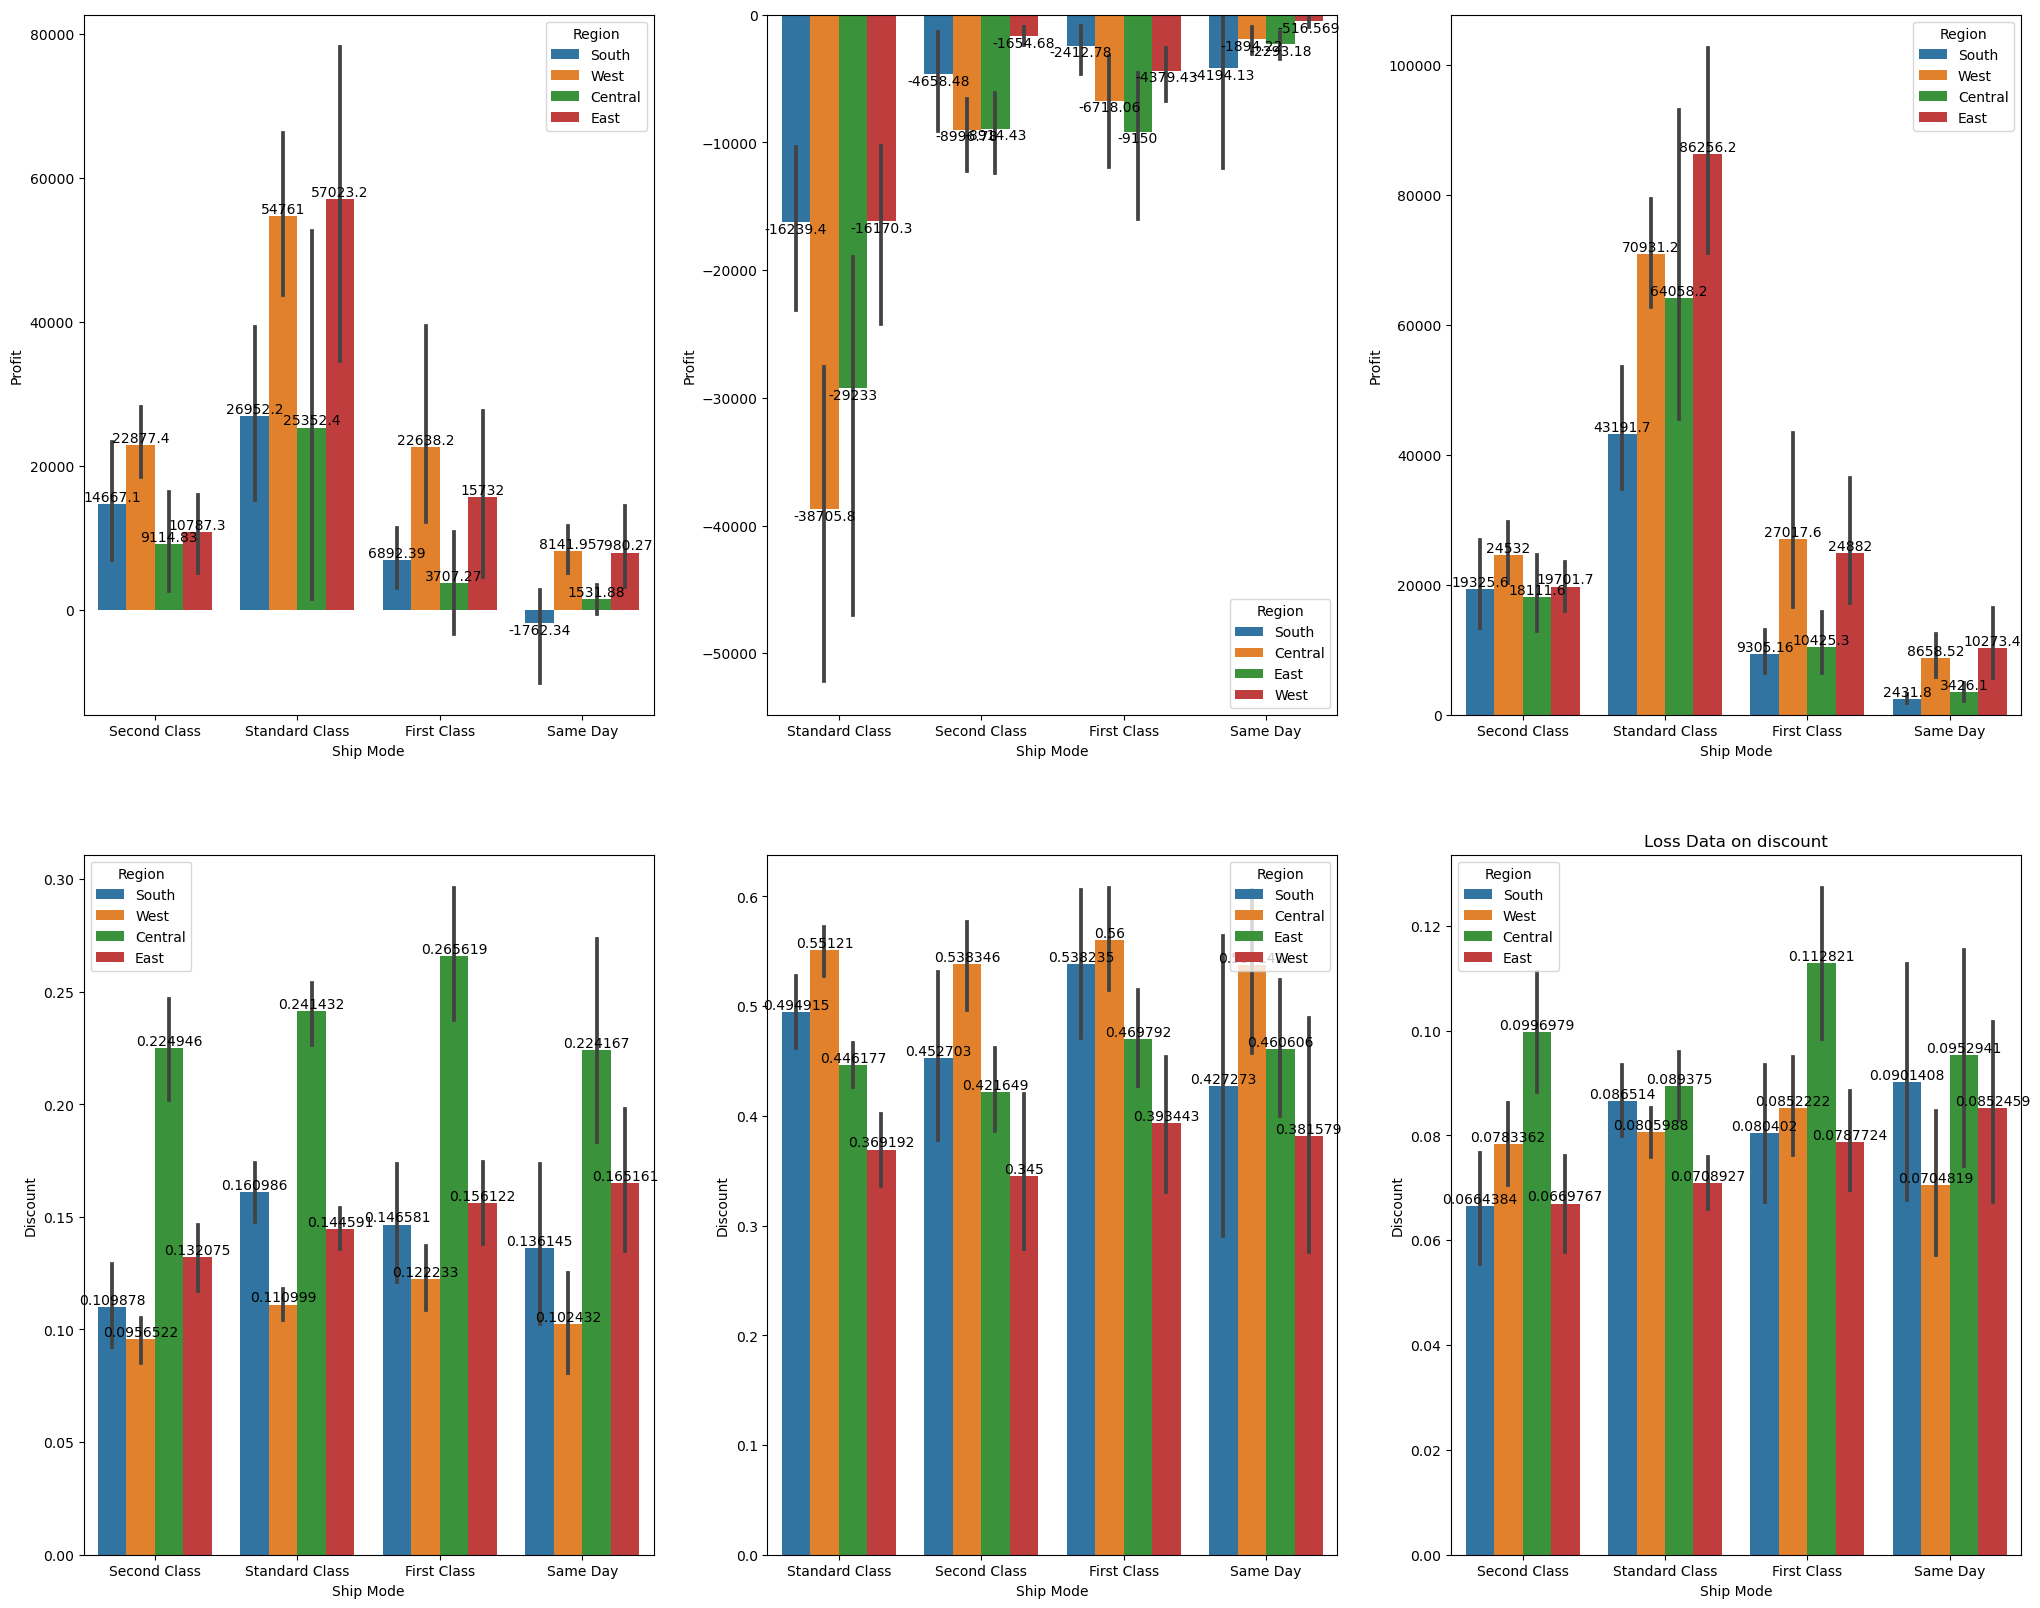

In [38]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
plt.title("Total Data on Profit")
x = sns.barplot(data=d, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)

plt.title("Loss Data on profit")
y = sns.barplot(data=loss, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
plt.title("Profit Data on profit")
z = sns.barplot(data=profit, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

plt.title("Total Data on discount")
x = sns.barplot(data=d, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,1])
plt.title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)

z = sns.barplot(data=profit, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

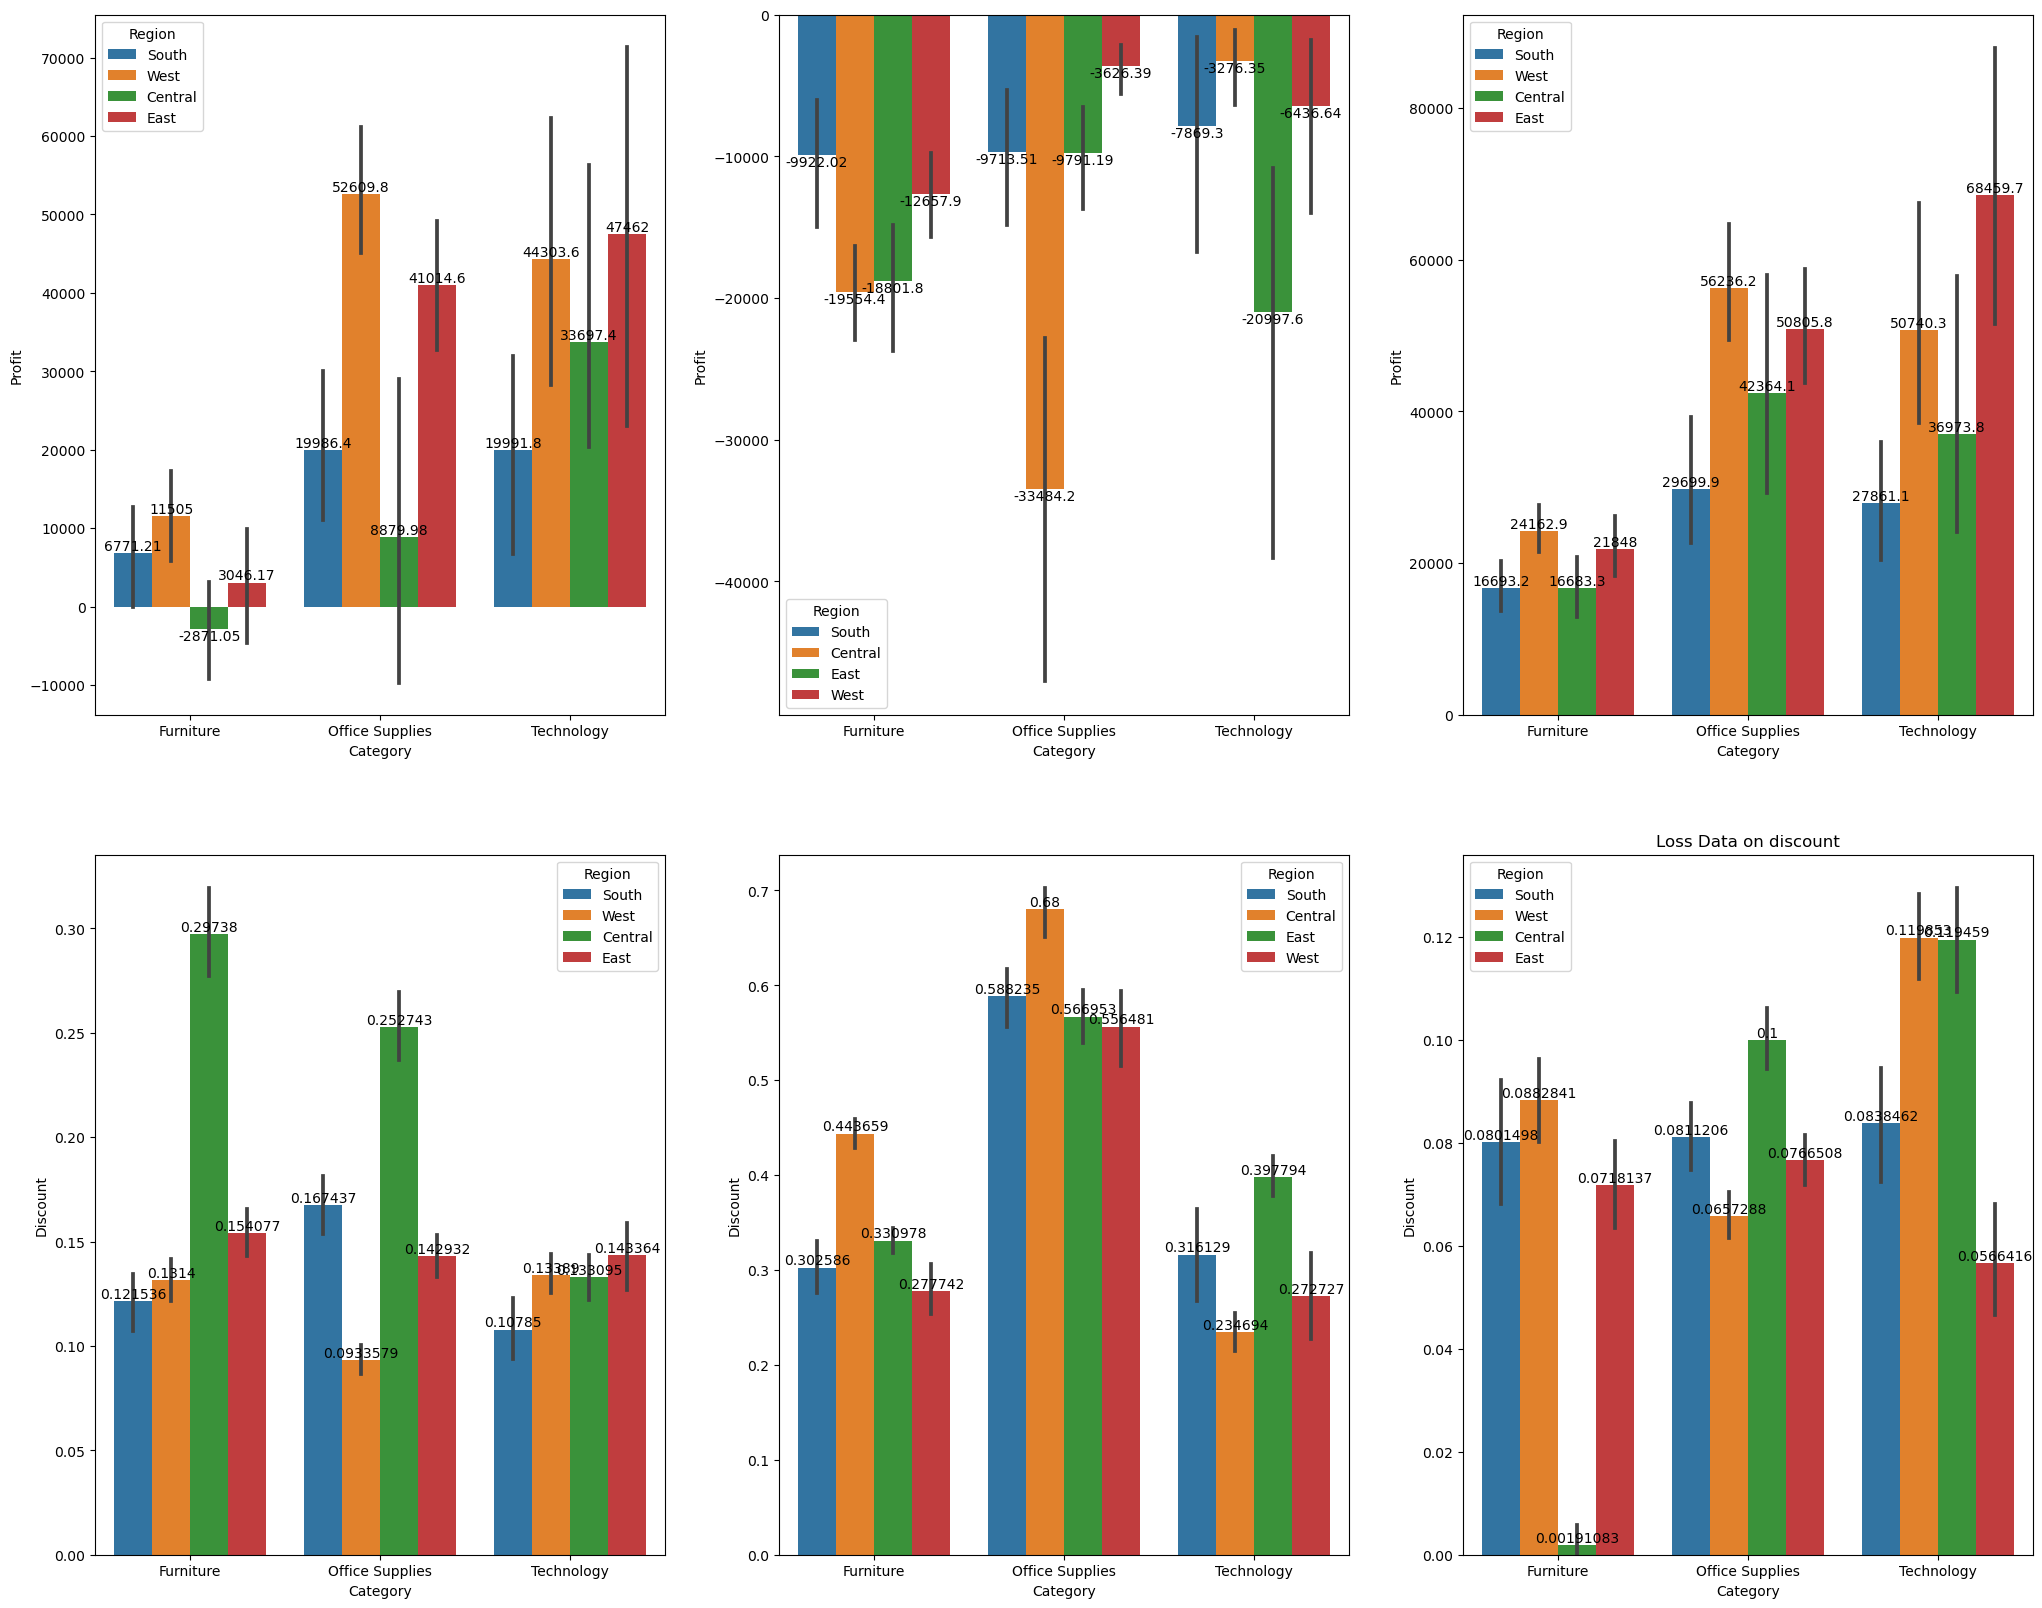

In [39]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
plt.title("Total Data on Profit")
x = sns.barplot(data=d, x='Category', y = 'Profit',hue = "Region", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)

plt.title("Loss Data on profit")
y = sns.barplot(data=loss, x='Category', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
plt.title("Profit Data on profit")
z = sns.barplot(data=profit, x='Category', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

plt.title("Total Data on discount")
x = sns.barplot(data=d, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,1])
plt.title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)

z = sns.barplot(data=profit, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

In [48]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [67]:
profit_margin_for_loss = ((loss["Profit"]/loss["Sales"])*100)
loss.insert(13,"Profit Margin", profit_margin_for_loss, True)

In [68]:

loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-160.000000
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-80.000000
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-5.882353
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-2.500000


In [73]:
# calculate the discount needed to break even
loss['Break even discount'] = -loss['Profit'] / loss['Sales'] / (1 - loss['Profit Margin'])

# calculate the percentage decrease in discount needed to turn a negative profit into a positive profit
loss['% decrease in discount'] = (loss['Break even discount'] - loss['Discount']) / loss['Discount'] * 100

loss

C:\Users\Gokul\AppData\Local\Temp\ipykernel_3512\1635455236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss['Break even discount'] = -loss['Profit'] / loss['Sales'] / (1 - loss['Profit Margin'])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_3512\1635455236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss['% decrease in discount'] = (loss['Break even discount'] - loss['Discount']) / loss['Discount'] * 100


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin,Break even discount,% decrease in discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000,0.009756,-97.831978
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000,0.009945,-98.756906
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000,0.009934,-98.758278
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571,0.005882,-98.039216
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000,0.009818,-98.036364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-160.000000,0.009938,-98.757764
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-80.000000,0.009877,-98.589065
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-5.882353,0.008547,-94.301994
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-2.500000,0.007143,-96.428571
